In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L, T = 1, 5
N, M = 64, 1000
h, t = 2 * L / N, T / M / 2 # h - шаг по координате (равномерная сетка на плоскости), t - шаг по времени между слоями w

In [3]:
t**2 + h**2 # погрешность метода

0.0009828125

In [4]:
r = t / h**2 # для удобства записи матрицы

In [5]:
def TMA(w : np.array):
    # на вход подается вектор w, решается система M.w1 = w, где M:
    # первая/последняя строки - гран. условия, имеют только элементы 11 и nn
    # остальные строки: ур-ия -r/2 w_i-1 + (r + 1) w_i - r/2 w_i+1 == r/2 w_i-1 + (1-r) w_i + r/2 w_i+1
    A = np.array([0] + [-r / 2 for i in range(N - 1)] + [0])
    B = np.array([1] + [ 1 + r for i in range(N - 1)] + [1])
    C = np.array([0] + [-r / 2 for i in range(N - 1)] + [0])
    D = (r / 2) * np.roll(w, 1) + (r / 2) * np.roll(w, -1) + (1 - r) * w # r/2 w_i-1 + (1-r) w_i + r/2 w_i+1
    D[0], D[-1] = 0, 0
    for i in range(1, N + 1):
        xi = A[i] / B[i - 1]
        B[i] -= xi * C[i - 1]
        D[i] -= xi * D[i - 1]
    W = np.zeros(N + 1)
    W[-1] = D[-1] / B[-1]
    for i in range(N - 1, -1, -1):
        W[i] = (D[i] - C[i] * W[i + 1]) / B[i]
    return W

In [5]:
x = np.linspace(-L, L, N + 1)
y = np.linspace(-L, L, N + 1)

X, Y = np.meshgrid(x, y) # создаем сетку

In [6]:
u0 = lambda x, y: (1 - x**2 / L**2) * (1 - y**2 / L**2) # начальное распределение температуры

In [7]:
Z0 = u0(X, Y) # начальное распр. темп.

In [9]:
T_max = np.zeros(M) # массив значений макс. темп. в центре
time = np.linspace(0, T, M)
W = [[np.zeros(N + 1), np.zeros(N + 1)] for i in range(M)] # массив M слоев температур
W[0] = Z0
T_max[0] = W[0][N // 2][N // 2]
for i in range(M - 1):
    temp = np.array([TMA(w) for w in W[i]]) # промежуточный слой, производная по x
    W[i + 1] = np.array([TMA(w) for w in temp.transpose()]).transpose() # след. слой, производня по y
    T_max[i + 1] = W[i + 1][N // 2][N // 2] # темп. в центре квадрата

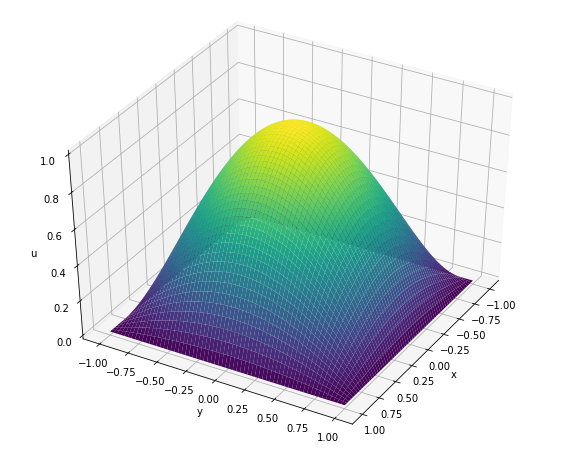

In [8]:
fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, W[999], rstride=1, cstride=1, 
                cmap='viridis', edgecolor='none')

ax.set_title('')
#ax.set_zlim((0,1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
ax.view_init(40,30)

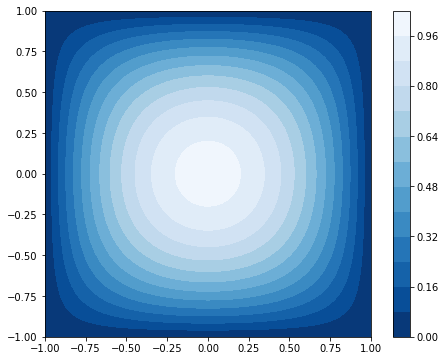

In [31]:
plt.figure(figsize=(8,6))
cs = plt.contourf(X, Y, Z0, 15, cmap='Blues_r')

plt.colorbar(cs)
plt.gca().set_aspect('equal')

Colormap  is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

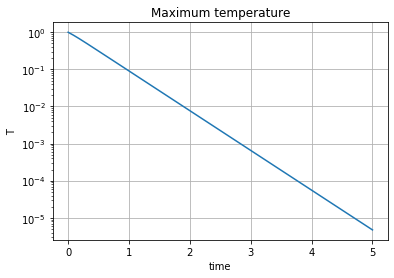

In [13]:
plt.figure()
plt.plot(time, T_max)
plt.yscale('log')
plt.xlabel('time')
plt.ylabel('T')
plt.title('Maximum temperature')
plt.grid()
plt.show()

In [14]:
def OLS(x : np.array, y: np.array): 
    K = len(x)
    b = (K * sum(x * y) - sum(x) * sum(y)) / (K * sum (x * x) - sum(x) ** 2)
    a = (sum(y) - b * sum(x)) / K
    y_ols = a * np.ones(K) + b * x
    std = (sum((y - y_ols) ** 2) / K) ** 0.5
    return a, b, std

In [21]:
start = 800 # начало линеаризации
OLS(np.array(time[start:]), np.log(T_max[start:])) # константа поднятия, тангенс накл.==показатель экспоненты, среднеквадр.откл.

(0.06309244210848192, -2.4644465974339185, 1.0919625409799022e-13)